### Pre-processing and EDA of Vaccinations data (India):

> - **The date of vaccinations available from 2020-01-15 till 2021-07-14**
> - Data Gathering of the below pre-processing and EDA steps from https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/country_data/India.csv
> - Below are the initial set of insights from the above dataset
> - This dataset is about the vaccination details specific to India
> - **Details about variables/columns:**
    - ```location```: Name of country for the data about vaccinations
    - ```date```: Date of the observation
    - ```vaccine```: List of vaccines administered in the country as per the current date shown
    - ```source_url```: URL link for the data/record
    - ```total_vaccinations```: Total number of doses administered. If a person receives one dose of the vaccine, this metric goes up by 1. If they receive a second dose, it goes up by 1 again.
    - ```people_vaccinated```: (**one-dose** vaccination) Total number of people who received at least one vaccine dose. If a person receives the first dose of a 2-dose vaccine, this metric goes up by 1. If they receive the second dose, the metric stays the same.
    - ```people_fully_vaccinated```: (**two-doses** vaccination) Total number of people who received all doses prescribed by the vaccination protocol. If a person receives the first dose of a 2-dose vaccine, this metric stays the same. If they receive the second dose, the metric goes up by 1.
> - This is a entire country-wise counts for the vaccination on a rolling daily basis of the above date range.
> - Other factors of covid for India states-wise available @ https://www.kaggle.com/imdevskp/covid19-corona-virus-india-dataset?select=complete.csv but from 2020-01-30 till 2020-08-06

- Notebook by Ramya N (GitHub user name: rnedesigns)

In [1]:
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### To pre-process and explore datasets (EDA):

> - Below steps to know about data fields, their content and data types
> - Finding shape of the dataset, descriptive statistics, metadata about the DataFrame
> - Imputing missing values if any
> - Transform column based on the categorical columns or date field. Ex: Pandas provides date field as object type that requires to translate to datetime type especially for time-series analysis, encoding categorical values based on weighate of the variables for the model fitting
> - Keeping the naming conventions of variables/fields consistant if they are not
> - Segregating datasets to training and test sets

In [3]:
vaccines_india_df = pd.read_csv('../task-1_datasets/collected_datasets/india_vacc_data-01152021-14072021.csv')
vaccines_india_df

,location,date,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated,source_url
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca",0,0,0,https://twitter.com/MoHFW_INDIA/status/1350459...
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca",191181,191181,0,https://twitter.com/MoHFW_INDIA/status/1350459...
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca",224301,224301,0,https://twitter.com/MoHFW_INDIA/status/1350815...
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca",454049,454049,0,https://www.mohfw.gov.in/
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca",674835,674835,0,https://www.mohfw.gov.in/
...,...,...,...,...,...,...,...
170,India,2021-07-10,"Covaxin, Oxford/AstraZeneca, Sputnik V",376032586,303171498,72861088,https://www.mohfw.gov.in/
171,India,2021-07-11,"Covaxin, Oxford/AstraZeneca, Sputnik V",377352501,304018852,73333649,https://www.mohfw.gov.in/
172,India,2021-07-12,"Covaxin, Oxford/AstraZeneca, Sputnik V",381467646,306612781,74854865,https://www.mohfw.gov.in/
173,India,2021-07-13,"Covaxin, Oxford/AstraZeneca, Sputnik V",387697935,311387539,76310396,https://www.mohfw.gov.in/


In [4]:
# For number rows/records and fields
vaccines_india_df.shape

(175, 7)

In [5]:
vaccines_india_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   location                 175 non-null    object
 1   date                     175 non-null    object
 2   vaccine                  175 non-null    object
 3   total_vaccinations       175 non-null    int64 
 4   people_vaccinated        175 non-null    int64 
 5   people_fully_vaccinated  175 non-null    int64 
 6   source_url               175 non-null    object
dtypes: int64(3), object(4)
memory usage: 9.7+ KB


In [6]:
# Here it's providing all the numerical computations in logarithmic format:
vaccines_india_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated
count,1.750000e+02,1.750000e+02,1.750000e+02
mean,1.288080e+08,1.052653e+08,2.354276e+07
std,1.161105e+08,9.383560e+07,2.254993e+07
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.457770e+07,1.205071e+07,2.526995e+06
50%,1.111796e+08,9.730191e+07,1.387766e+07
75%,2.095575e+08,1.663945e+08,4.316296e+07
max,3.913405e+08,3.135295e+08,7.781099e+07


In [7]:
vaccines_india_df.date[0].split('-')[0]

'2021'

In [8]:
vaccines_india_df.date[0].split('-')[1]

'01'

In [9]:
def extract_year(date):
    return date.split('-')[0]

In [10]:
def extract_month(date):
    return date.split('-')[1]

In [11]:
vaccines_india_df['year'] = vaccines_india_df['date'].apply(extract_year)

In [12]:
vaccines_india_df['month'] = vaccines_india_df['date'].apply(extract_month)

In [13]:
vaccines_india_df

,location,date,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated,source_url,year,month
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca",0,0,0,https://twitter.com/MoHFW_INDIA/status/1350459...,2021,01
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca",191181,191181,0,https://twitter.com/MoHFW_INDIA/status/1350459...,2021,01
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca",224301,224301,0,https://twitter.com/MoHFW_INDIA/status/1350815...,2021,01
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca",454049,454049,0,https://www.mohfw.gov.in/,2021,01
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca",674835,674835,0,https://www.mohfw.gov.in/,2021,01
...,...,...,...,...,...,...,...,...,...
170,India,2021-07-10,"Covaxin, Oxford/AstraZeneca, Sputnik V",376032586,303171498,72861088,https://www.mohfw.gov.in/,2021,07
171,India,2021-07-11,"Covaxin, Oxford/AstraZeneca, Sputnik V",377352501,304018852,73333649,https://www.mohfw.gov.in/,2021,07
172,India,2021-07-12,"Covaxin, Oxford/AstraZeneca, Sputnik V",381467646,306612781,74854865,https://www.mohfw.gov.in/,2021,07
173,India,2021-07-13,"Covaxin, Oxford/AstraZeneca, Sputnik V",387697935,311387539,76310396,https://www.mohfw.gov.in/,2021,07


In [14]:
# Median value on a monthly basis for how many total vaccines administered, one-dose vaccinated and two-dose vaccinated:
vaccines_india_df.groupby('month').agg({'total_vaccinations': 'median', 'people_vaccinated': 'median', 'people_fully_vaccinated': 'median'})

,total_vaccinations,people_vaccinated,people_fully_vaccinated
month,,,
01,1582201.0,1582201.0,0.0
02,8516771.0,8418653.0,98118.0
03,35064536.0,28862037.0,6202499.0
04,114493238.0,100179199.0,14314039.0
05,181897771.0,141448223.5,40449547.5
06,256815633.0,209136960.5,47678672.5
07,358070763.0,291184757.0,66886006.0


In [15]:
# So the dataset from resource contains mean value for total_vaccinations, people_vaccinated & people_fully_vaccinated for every day:
vaccines_india_df.groupby('date').agg({'total_vaccinations': 'mean', 'people_vaccinated': 'mean', 'people_fully_vaccinated': 'mean'})

,total_vaccinations,people_vaccinated,people_fully_vaccinated
date,,,
2021-01-15,0.0,0.0,0.0
2021-01-16,191181.0,191181.0,0.0
2021-01-17,224301.0,224301.0,0.0
2021-01-18,454049.0,454049.0,0.0
2021-01-19,674835.0,674835.0,0.0
...,...,...,...
2021-07-10,376032586.0,303171498.0,72861088.0
2021-07-11,377352501.0,304018852.0,73333649.0
2021-07-12,381467646.0,306612781.0,74854865.0


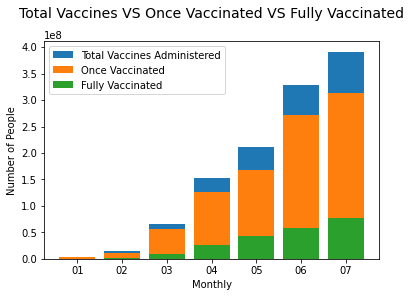

In [16]:
# The y-axis columns are of mean values from this dataset:

plt.bar(vaccines_india_df.month, vaccines_india_df.total_vaccinations, label='Total Vaccines Administered')
plt.bar(vaccines_india_df.month, vaccines_india_df.people_vaccinated, label='Once Vaccinated')
plt.bar(vaccines_india_df.month, vaccines_india_df.people_fully_vaccinated, label='Fully Vaccinated')

plt.title('Total Vaccines VS Once Vaccinated VS Fully Vaccinated', fontsize=14, y=1.08)
plt.xlabel('Monthly')
plt.ylabel('Number of People')
plt.legend();

#### Note: Above bar graph of vaccinations usage, shows that some portion of supplied vaccinations as unused/wasted every month